# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Run this code:

%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
# Import numpy and pandas:
import numpy as np
import pandas as pd



# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [3]:
# Run this code

cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None))
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None))

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [4]:
# Your code here:
print(cats.shape)
print(dogs.shape)

(4096, 80)
(4096, 80)


What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [5]:
# Your code here:
cats[0]

array([ 64,  23, 250, 137,  55, 173,  18, 134,  19,  47, 109, 164,  41,
        78, 108, 108, 247, 105, 158,  54, 103,   4,  23, 102, 239,  72,
        42,  21, 168, 109, 112, 177,  22, 233,  15, 236, 250, 137,  32,
         5, 178, 109,  24, 107,  53, 241, 226, 143,   5, 136,  98, 100,
        89,  66, 228,  92, 255,  88, 230,  56, 160,  69,   6,  24, 195,
       183, 239,  35, 154, 154, 122,  18,  87, 106, 174,  69,  28,  60,
       223, 101])

Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

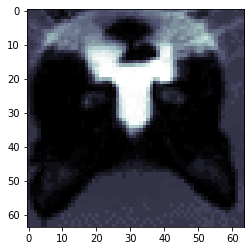

In [6]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(cats[::-1,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

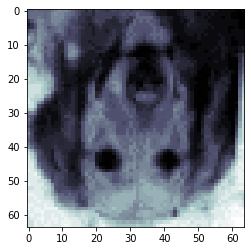

In [7]:
# Run this code:

fig, ax = plt.subplots()
ax.imshow(dogs[::-1,0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest') 

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

Hint: To find the mean and standard deviation of each image, use `numpy`'s version of mean and stadnard deviation and use `axis=0`.

In [8]:

def standardize(x):
    #This function takes as input a numpy array and returns a stadardized numpy array of the same dimensions.
    #Sample input: np.array([[1,2,3],[4,5,6]])
    #Sample output: np.array([[-1,-1,-1],[1,1,1]])
    
    # Your code here:
    desv = np.std(x,axis=0) 
    media = np.mean(x,axis=0)
    stand = (x-media)/desv
    return stand
        


Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [9]:
# Your code here:

pets = np.concatenate((cats,dogs), axis=1)

Standardize the concatenated array below.

In [10]:
# Your code here:

std_pets = standardize(pets)

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function from `statsmodels` (read about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.multivariate.pca.PCA.html)) and apply the function to our standarized data. Create a PCA model with two components.

In [12]:
# Your code here:
from statsmodels.multivariate.pca import PCA

pca_pets = PCA(std_pets, ncomp=2)
pca_pets

Principal Component Analysis(nobs: 4096, nvar: 160, transformation: Standardize (Correlation), normalization: True, number of components: 2, SVD, id: 0x11ef2b290)

Use `numpy` to find to transpose the standardized pet array. This will help us compute the projection.

In [13]:
# Your code here:
pets_trans = std_pets.T
pets_trans

array([[ 0.08483333,  0.08483333,  0.08483333, ...,  0.08483333,
         0.08483333,  0.0376196 ],
       [-1.50629151, -1.50629151, -1.56078403, ..., -1.36097813,
        -1.50629151, -1.76058993],
       [ 1.80099272,  1.80099272,  1.80099272, ...,  1.73863632,
         1.61392352,  1.73863632],
       ...,
       [-1.20040955, -1.1555871 , -1.20040955, ..., -1.18920394,
        -1.1555871 , -1.18920394],
       [-1.96502931, -1.30339954, -1.30339954, ...,  0.29129785,
        -0.09889407, -0.09889407],
       [ 1.40507148,  1.43412363,  1.37601933, ...,  0.95476315,
         1.01286745,  1.02739353]])

Find the dot product of the transposed standardized pet matrix and the `factors` of the `PCA` model found above. This will be the projection onto 2 dimensions. This means that each cat and dog image will now only have two columns instead of 4096.

In [15]:
# Your code here
pets_2d = np.dot(pets_trans,pca_pets.factors)
pets_2d

array([[-15.65535387,  14.21896962],
       [-49.69180918,   1.02037256],
       [ 48.16605191,   3.7528642 ],
       [ 41.00710478,  -1.33593154],
       [-30.17992665,  17.50527999],
       [-20.86863603,  32.92673293],
       [-41.40505348,  -2.96678177],
       [ -5.21364832,  16.98706106],
       [-42.36328171,   7.61915106],
       [-21.04212661,  17.22317831],
       [  0.06504733,   4.65422311],
       [  5.76076325,   4.41333431],
       [-51.79926744,   9.90289121],
       [-30.32243658,  11.90543813],
       [ 28.89795759,  13.75861683],
       [-39.1612538 ,  16.44552986],
       [ 28.95400781,  10.90627483],
       [-33.24421981,  10.4768311 ],
       [ 42.8326886 ,  -0.79074765],
       [-50.59949364,   4.93943605],
       [ 10.98031318,  12.22131458],
       [-35.53242394,  -1.86619381],
       [-35.51807307, -13.04056466],
       [-34.03177436, -32.11339673],
       [ 51.60182946,   5.87830409],
       [ -7.0381312 , -21.65566454],
       [-34.95042527,  18.00924989],
 

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [21]:
# Your code here:
df = pd.DataFrame(pets_2d, columns=('pc1','pc2'))

Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [27]:
# Your code here:
colors = ['blue']*80 + ['red']*80


160

Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

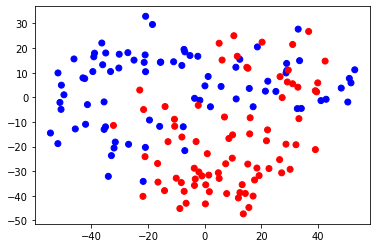

In [30]:
# Your code here:

plt.scatter(df.pc1, df.pc2,c=colors)

Do you see a clear separation between cats and dogs? Write your answer below.

In [ ]:
# Your conclusions here:
'''Si, se ve que hay una zona con más predominancia de puntos azules que rojos y viceversa, 
por lo que se podrian separar gatoos de perros más o menos bien.
'''